In [1]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [2]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet.tfkeras import EfficientNetB4
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

Using TensorFlow backend.
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\AppData\Roa

In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.models import Model, load_model

In [6]:
#!pip install -U --pre efficientnet

In [7]:
# loading pretrained model
#model = EfficientNetB0(weights='imagenet')

In [8]:
#num_classes = 2
#model = Sequential()

In [9]:
#model.add(EfficientNetB3(weights='imagenet'))

In [10]:
#model.input_shape

num_classes = 2
model = Sequential()
# loading pretrained model
model.add(EfficientNetB3(
    #classes=2,
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False
    #,    pooling='max'
))
#model.add(layers.GlobalMaxPooling2D(name="gap"))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
import keras.backend as K

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.optimizers import SGD

from keras import initializers
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU, PReLU

num_classes = 2
model = Sequential()
model.add(EfficientNetB4(include_top=False, pooling='avg', weights='imagenet'))

model.add(Dense(512, kernel_initializer=initializers.he_normal(seed=None)))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer=initializers.he_normal(seed=None)))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_initializer=initializers.he_normal(seed=None)))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b4 (Model)      (None, 1792)              17673816  
_________________________________________________________________
dense (Dense)                (None, 512)               918016    
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 256)               256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [14]:
model.layers[0]

In [15]:
# Path to data
data_dir  = 'chest_xray/chest_xray/'
train_dir = data_dir+'train/'
test_dir  = data_dir+'test/'
val_dir   = data_dir + 'val/'

# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir + 'NORMAL/'
pneumonia_cases_dir = train_dir + 'PNEUMONIA/'

print("Datasets:",os.listdir(data_dir))
print("Train:\t", os.listdir(train_dir))
print("Test:\t", os.listdir(test_dir))

Datasets: ['.DS_Store', 'test', 'train', 'val']
Train:	 ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Test:	 ['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [16]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

NORMAL


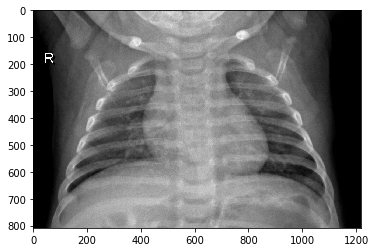

In [17]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img(normal_cases_dir + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


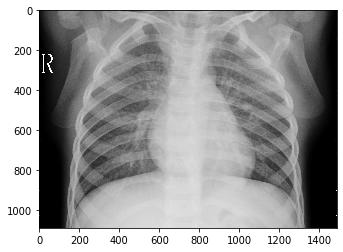

In [18]:
img_name = 'person1044_virus_1740.jpeg'
img_pneumonia = load_img(pneumonia_cases_dir + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

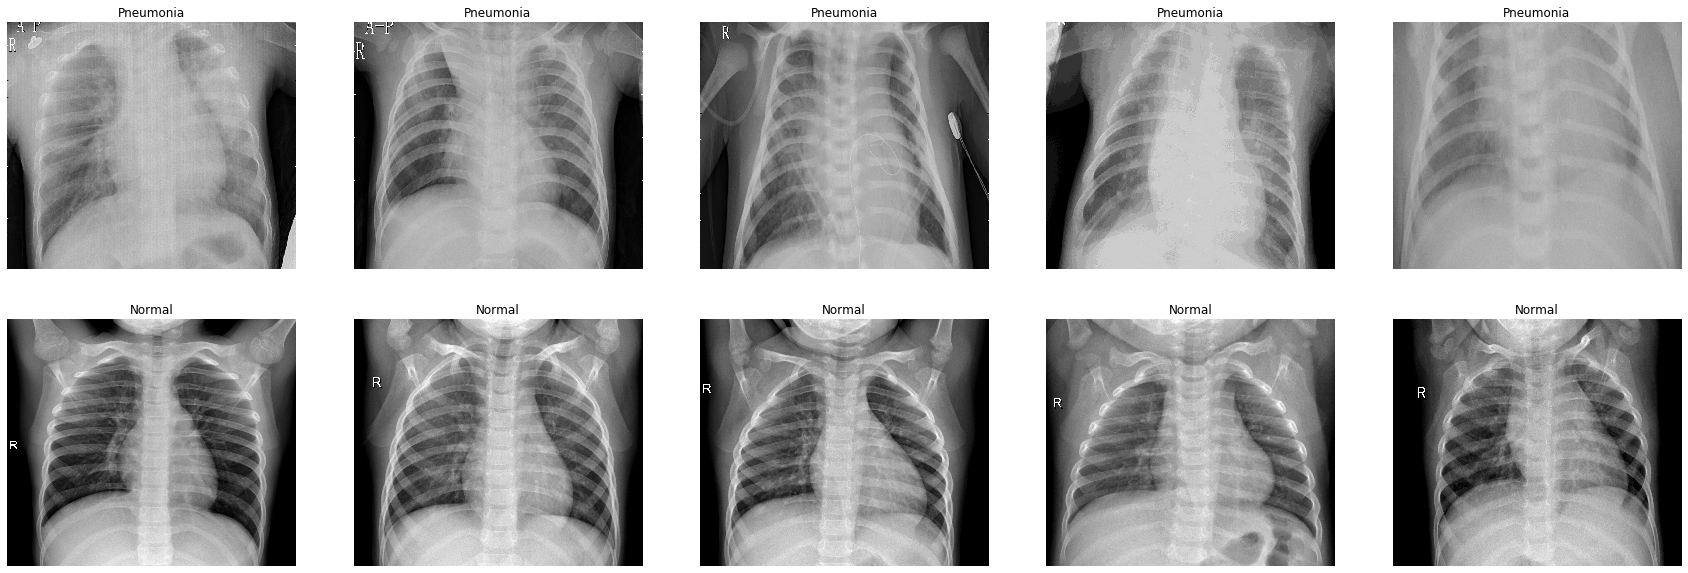

In [19]:
# Get the list of all the images
normal_cases = glob(normal_cases_dir+'/*.jpeg')
pneumonia_cases = glob(pneumonia_cases_dir+'/*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [20]:
train_data.dtypes

image    object
label     int64
dtype: object

1    3875
0    1341
Name: label, dtype: int64


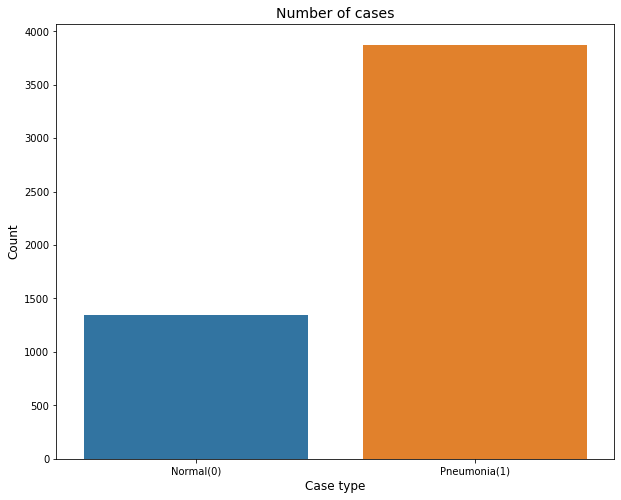

In [21]:
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [22]:
train_data

,image,label
0,chest_xray/chest_xray/train/PNEUMONIA\person66...,1
1,chest_xray/chest_xray/train/PNEUMONIA\person18...,1
2,chest_xray/chest_xray/train/PNEUMONIA\person58...,1
3,chest_xray/chest_xray/train/PNEUMONIA\person75...,1
4,chest_xray/chest_xray/train/PNEUMONIA\person63...,1
...,...,...
5211,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
5212,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
5213,chest_xray/chest_xray/train/PNEUMONIA\person10...,1
5214,chest_xray/chest_xray/train/PNEUMONIA\person56...,1


In [23]:
listdata=train_data.loc[train_data['label']==0].values.tolist()*2
pd.DataFrame((train_data.loc[train_data['label']==0].values.tolist()*2),columns=['image','label'])

,image,label
0,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
1,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2,chest_xray/chest_xray/train/NORMAL\IM-0722-000...,0
3,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
4,chest_xray/chest_xray/train/NORMAL\IM-0545-000...,0
...,...,...
2677,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2678,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2679,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2680,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0


In [24]:
train_data=train_data.append(pd.DataFrame(listdata, columns=['image','label']),ignore_index=True)

In [25]:
train_data

,image,label
0,chest_xray/chest_xray/train/PNEUMONIA\person66...,1
1,chest_xray/chest_xray/train/PNEUMONIA\person18...,1
2,chest_xray/chest_xray/train/PNEUMONIA\person58...,1
3,chest_xray/chest_xray/train/PNEUMONIA\person75...,1
4,chest_xray/chest_xray/train/PNEUMONIA\person63...,1
...,...,...
7893,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7894,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7895,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7896,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0


In [26]:
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data

,image,label
0,chest_xray/chest_xray/train/PNEUMONIA\person58...,1
1,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2,chest_xray/chest_xray/train/NORMAL\IM-0508-000...,0
3,chest_xray/chest_xray/train/PNEUMONIA\person12...,1
4,chest_xray/chest_xray/train/NORMAL\IM-0545-000...,0
...,...,...
7893,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7894,chest_xray/chest_xray/train/PNEUMONIA\person67...,1
7895,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7896,chest_xray/chest_xray/train/PNEUMONIA\person55...,1


0    4023
1    3875
Name: label, dtype: int64


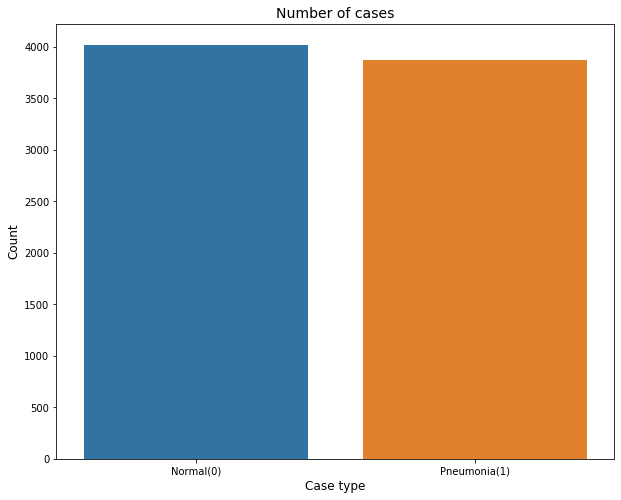

In [27]:
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [28]:
train_datastr=train_data
train_datastr['label']=train_datastr['label'].astype(str)

In [29]:
train_datastr

,image,label
0,chest_xray/chest_xray/train/PNEUMONIA\person58...,1
1,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
2,chest_xray/chest_xray/train/NORMAL\IM-0508-000...,0
3,chest_xray/chest_xray/train/PNEUMONIA\person12...,1
4,chest_xray/chest_xray/train/NORMAL\IM-0545-000...,0
...,...,...
7893,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7894,chest_xray/chest_xray/train/PNEUMONIA\person67...,1
7895,chest_xray/chest_xray/train/NORMAL\NORMAL2-IM-...,0
7896,chest_xray/chest_xray/train/PNEUMONIA\person55...,1


In [30]:
#from tensorflow.python.keras.applications import preprocess_input, decode_predictions

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
image_size = 224
nb_train_samples = len(train_datastr) # number of files in training set
batch_size = 22

EPOCHS =30
STEPS = nb_train_samples / batch_size

## Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                             horizontal_flip = True,
                                             rotation_range=20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                             #,                                           rescale=1. / 255
                                            )
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input
                                           #,rescale=1. / 255
                                          )

train_generator = data_generator_with_aug.flow_from_dataframe(
       dataframe=train_datastr,
       directory = '',
       x_col='image',
       y_col='label',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'binary',
       color_mode='rgb')

validation_generator = data_generator_no_aug.flow_from_directory(
       directory = 'chest_xray/val/',
       target_size = (image_size, image_size),
       class_mode = 'binary',
       color_mode='rgb')

test_generator = data_generator_no_aug.flow_from_directory(
       directory = 'chest_xray/test/',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'binary',
       color_mode='rgb',
       shuffle=False)

Found 7898 validated image filenames belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
model.fit_generator(
       train_generator, # specify where model gets training data
       epochs = EPOCHS,
       steps_per_epoch=STEPS,
       validation_data=test_generator) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/30
359/359 [==============================] - 2998s 8s/step - loss: 0.5414 - acc: 0.7506 - val_loss: 0.5756 - val_acc: 0.7564
Epoch 2/30
359/359 [==============================] - 2830s 8s/step - loss: 0.3449 - acc: 0.8692 - val_loss: 0.4771 - val_acc: 0.8205
Epoch 3/30
359/359 [==============================] - 2833s 8s/step - loss: 0.2956 - acc: 0.8835 - val_loss: 0.4529 - val_acc: 0.8269
Epoch 4/30
359/359 [==============================] - 2831s 8s/step - loss: 0.2756 - acc: 0.8896 - val_loss: 0.4265 - val_acc: 0.8317
Epoch 5/30
359/359 [==============================] - 2842s 8s/step - loss: 0.2541 - acc: 0.9028 - val_loss: 0.4334 - val_acc: 0.8285
Epoch 6/30
359/359 [==============================] - 2821s 8s/step - loss: 0.2487 - acc: 0.9036 - val_loss: 0.4315 - val_acc: 0.8109
Epoch 7/30
359/359 [==============================] - 2837s 8s/step - loss: 0.2302 - acc: 0.9115 - val_loss: 0.4404 - val_acc: 0.8285
Epoch 8/30
359/359 [==============================] - 2829s 8s

In [34]:
from tensorflow.python.keras.models import load_model
model.save('xray_modelefnet4_doublesgd30.h5')

In [33]:
model = load_model('xray_modelefnet4_doublesgd30.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


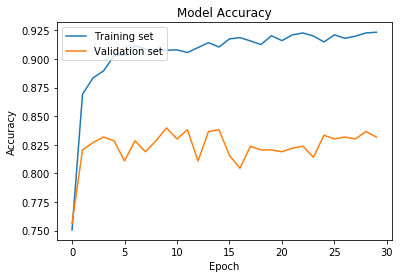

In [36]:
# Accuracy 
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

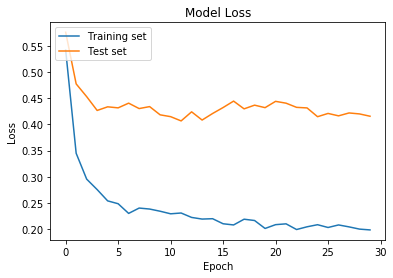

In [37]:
# Loss 
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn.metrics import classification_report
pred = model.predict(test_generator)
true_classes=test_generator.classes

In [36]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(true_classes, pred)

0.8843633574402805

In [37]:
l=list(np.round(np.arange(0,1.01,0.01),2))
spec=[]
rec=[]
prec=[]
acc=[]
pcor=[]
for i in l:
    cm = confusion_matrix(true_classes, pred>i)
    spec.append(cm[0,0]/(cm[0,0]+cm[0,1]))
    rec.append(cm[1,1]/(cm[1,0]+cm[1,1]))
    prec.append(cm[1,1]/(cm[1,1]+cm[0,1]))
    acc.append((cm[1,1]+cm[0,0])/sum(cm.ravel()))
    pcor.append(cm[0,0]/(cm[0,0]+cm[1,0]))
prec[100]=1

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


In [38]:
thr=np.argmax((np.array(spec)>0.81))/100
thr

0.63

In [40]:
num=np.argmax((np.array(spec)>0.81))
num

63

In [49]:
print(classification_report(true_classes,pred>thr))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       234
           1       0.88      0.83      0.86       390

    accuracy                           0.83       624
   macro avg       0.81      0.82      0.82       624
weighted avg       0.83      0.83      0.83       624



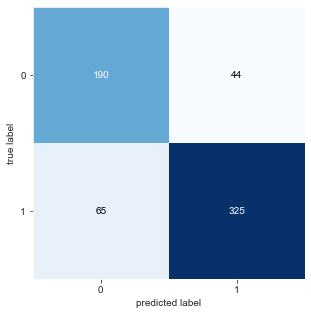

In [51]:
CM = confusion_matrix(true_classes, pred> thr)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
plt.show()

In [41]:
fscore=[]
for i in range(len(prec)):
    fscore.append(2*prec[i]*rec[i]/(rec[i]+prec[i]))

Text(0.5, 0, 'threshold')

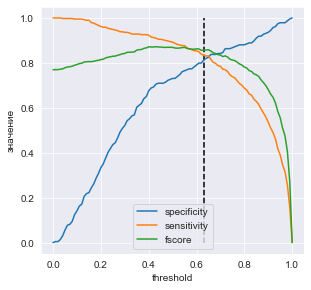

In [45]:
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
plt.plot(l,spec)
plt.plot(l,rec)
plt.plot(l,fscore)
plt.vlines(thr, 0,1,ls='--')
plt.legend( ('specificity', 'sensitivity','fscore'))
plt.ylabel('значение')
plt.xlabel('threshold')

<Figure size 1080x720 with 0 Axes>

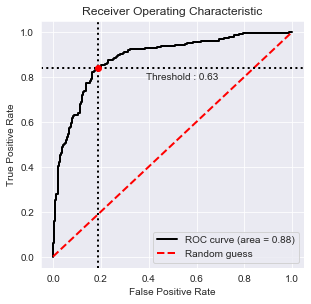

<Figure size 1080x720 with 0 Axes>

In [43]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(true_classes, pred, labels=["Class 1", "Class 2"],threshold=thr)

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.figure(figsize=(15,10))

In [52]:
specificity1 = CM[0,0]/(CM[0,0]+CM[0,1])
sensitivity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity1)
print('Sensitivity : ', sensitivity1 )

Specificity :  0.811965811965812
Sensitivity :  0.8333333333333334


In [53]:
print('Чувствительность:',round(rec[num],3))
print('Специфичность:',round(spec[num],3))
print('Точность:',round(acc[num],3))
print('Отношение правдоподобия положительного результата:',round(rec[num]/(1-spec[num]),3))
print('Отношение правдоподобия отрицательного результата:',round((1-rec[num])/spec[num],3))
print('Прогностическая ценность положительного результата:',round(prec[num],3))
print('Прогностическая ценность отрицательного результат:',round(pcor[num],3))
print('Частота ложных срабатываний:',round(1-spec[num],3))
print('AUC ROC:',round(roc_auc_score(true_classes, pred),3))

Чувствительность: 0.833
Специфичность: 0.812
Точность: 0.825
Отношение правдоподобия положительного результата: 4.432
Отношение правдоподобия отрицательного результата: 0.205
Прогностическая ценность положительного результата: 0.881
Прогностическая ценность отрицательного результат: 0.745
Частота ложных срабатываний: 0.188
AUC ROC: 0.884


Actual class: PNEUMONIA
Predicted class: Pneumonia
Prediction: 0.8794


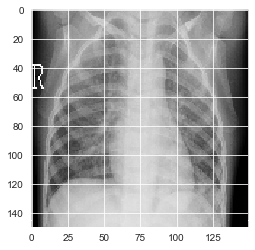

In [71]:
def choose_image_and_predict():
    normal_or_pneumonia = ['NORMAL', 'PNEUMONIA']
    folder_choice = (random.choice(normal_or_pneumonia))
    
    pneumonia_images = glob('chest_xray/val/'+folder_choice+'/*')
    img_choice = (random.choice(pneumonia_images))

    img = load_img(img_choice, target_size=(150, 150))
    img = img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred = model.predict(x)
    print("Actual class:", folder_choice)
    if pred<=thr:
        print("Predicted class: Normal")
        print("Prediction:", pred[0][0].round(4))
    else:
        print("Predicted class: Pneumonia")
        print('Prediction:', pred[0][0].round(4))
       
        
choose_image_and_predict()

In [72]:
scores = model.evaluate_generator(validation_generator)

In [73]:
scores

[0.707150399684906, 0.625]